## Loading and PreProcessing data

In [158]:
import pandas as pd
import numpy as np

In [159]:
# Reading the dataset from csv file.

data = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [161]:
# Checking for nan values in the dataset.

data.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [162]:
# Dropping the nan values from the dataset.

data.dropna(inplace = True)

In [163]:
# Stripping the whitespaces and converting to lowercase in the 'clean_comment' column.

data["clean_comment"].apply(lambda review: review.strip().lower())

0        family mormon have never tried explain them th...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
37244                                                jesus
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                 downvote karna tha par upvote hogaya
37247                                            haha nice
37248                facebook itself now working bjp’ cell
Name: clean_comment, Length: 37149, dtype: object

In [164]:
# Replacing new line characters with space in the 'clean_comment' column.

data.replace("\n", " ",inplace = True)

In [165]:
# Checking for duplicate values in the dataset.

data.duplicated().sum()

np.int64(351)

In [166]:
# Dropping duplicate values from the dataset.

data.drop_duplicates(inplace = True)

In [167]:
# Checking for comments that contains URLs in the 'clean_comment' column.

url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['clean_comment'].str.contains(url_pattern, regex = True)]

comments_with_urls.head()

,clean_comment,category


In [168]:
# Identifying the comments containing new line characters.
comments_with_newline = data[data['clean_comment'].str.contains('\n')]

# Displaying the comments containing new line characters.
comments_with_newline.head()

,clean_comment,category
106,pretty sure this sarcasm satire the news 1500...,1
217,lots streams this site vietnam arsenal html\n,0
317,the govt should have only one religion says t...,0
448,what missing jpg\nand why this brilliant edit ...,1
495,you wondering whether girl will get through t...,1


In [169]:
data["text_category"] = data["category"].apply(lambda x: 'Positive' if x == 1 else('Negative' if x == -1 else 'Neutral'))

## Exploratory Data Analysis (EDA)

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

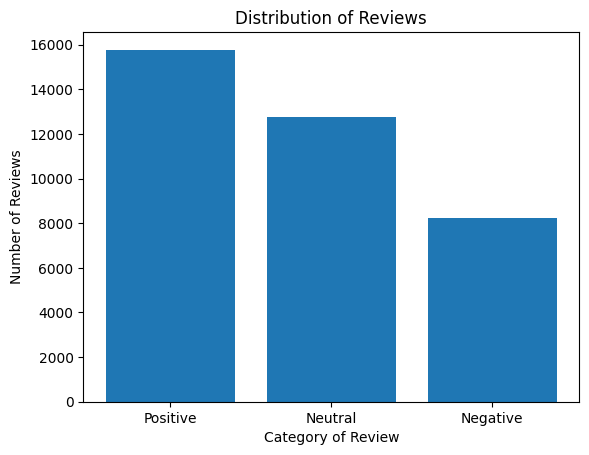

In [171]:
# Plotting the distribution of reviews in the dataset.

reviewCounts = dict(data["text_category"].value_counts())

x = reviewCounts.keys()
y = [reviewCounts[value] for value in x]

plt.title("Distribution of Reviews")

plt.xlabel("Category of Review")
plt.ylabel("Number of Reviews")

plt.bar(x, y)
plt.show()

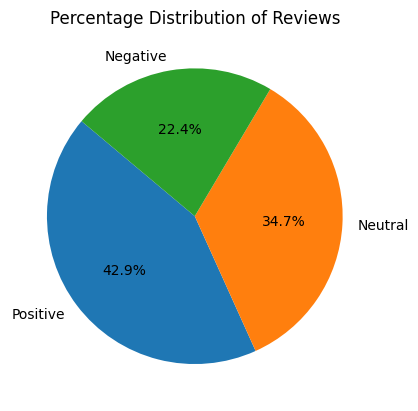

In [172]:
# Plotting the percentage distribution of reviews in the dataset.

reviewPercent = dict(data["text_category"].value_counts(normalize = True).mul(100).round(2))

x = reviewPercent.keys()
y = [reviewPercent[value] for value in x]

plt.title("Percentage Distribution of Reviews")

plt.pie(y, labels = x, autopct = '%1.1f%%', startangle = 140)
plt.show()

In [173]:
# Counting the no of words in each comment and storing it in a new column 'words'.

data["words"] = data["clean_comment"].apply(lambda review: len(review.split()))

data.head()

,clean_comment,category,text_category,words
0,family mormon have never tried explain them t...,1,Positive,39
1,buddhism has very much lot compatible with chr...,1,Positive,196
2,seriously don say thing first all they won get...,-1,Negative,86
3,what you have learned yours and only yours wha...,0,Neutral,29
4,for your own benefit you may want read living ...,1,Positive,112


In [174]:
data["words"].describe()

count    36798.000000
mean        29.663433
std         56.787932
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: words, dtype: float64

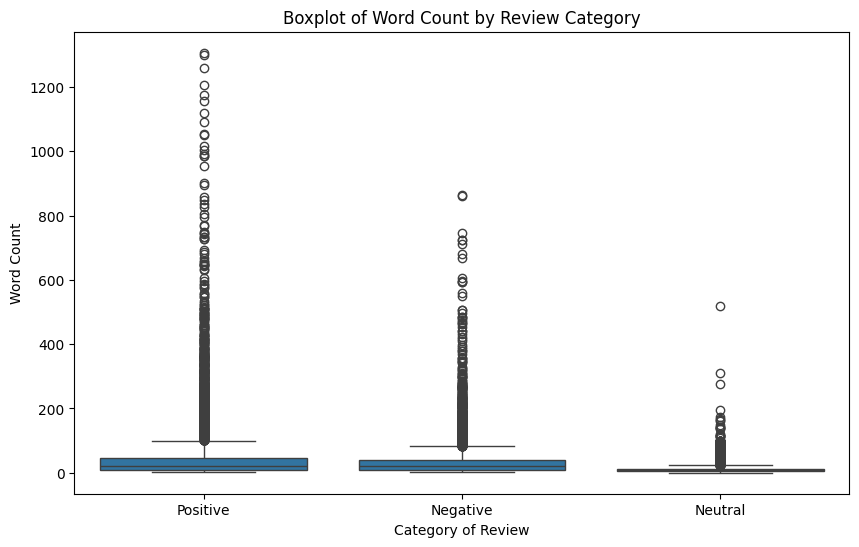

In [175]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'text_category', y = 'words')
plt.title('Boxplot of Word Count by Review Category')
plt.xlabel('Category of Review')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers than positive comments.

In [176]:
# Counting stopwords in every review.

from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
data['num_stop_words'] = data['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /Users/dhruv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
data.head()

,clean_comment,category,text_category,words,num_stop_words
0,family mormon have never tried explain them t...,1,Positive,39,13
1,buddhism has very much lot compatible with chr...,1,Positive,196,59
2,seriously don say thing first all they won get...,-1,Negative,86,40
3,what you have learned yours and only yours wha...,0,Neutral,29,15
4,for your own benefit you may want read living ...,1,Positive,112,45


/var/folders/_y/z_ggxb911fqfnxb7012b8_pc0000gn/T/ipykernel_51909/2157008807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_df, x = 'count', y = 'stop_word', palette = 'viridis')


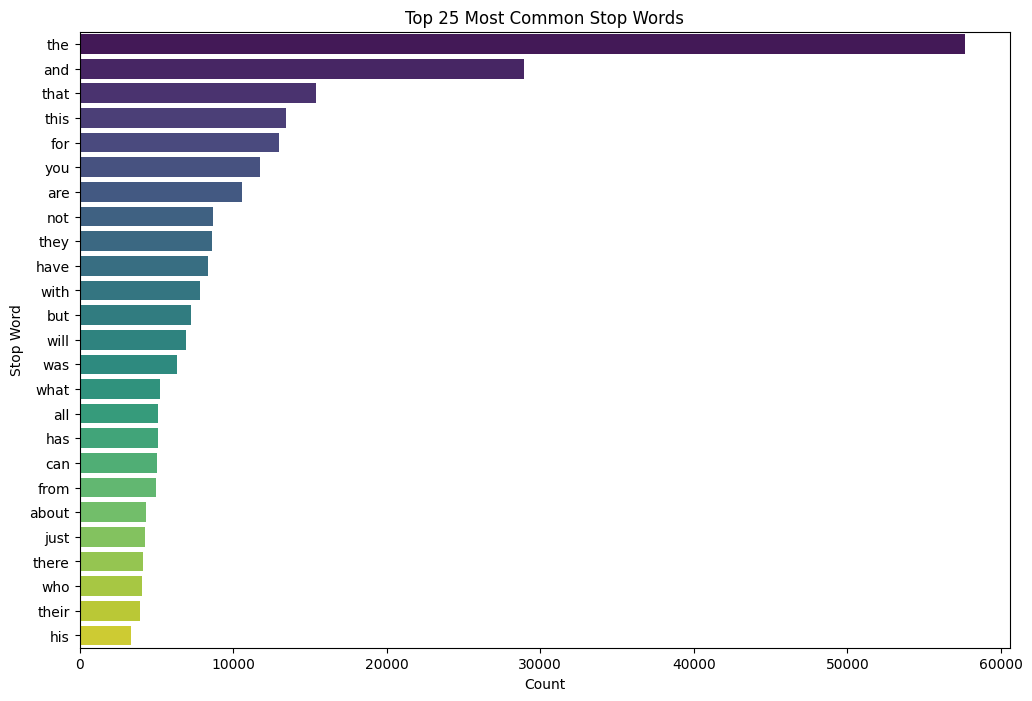

In [178]:
# Create a frequency distribution of stop words in the 'clean_comment' column.
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'.
all_stop_words = [word for comment in data['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words.
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting.
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words.
plt.figure(figsize = (12, 8))
sns.barplot(data = top_25_df, x = 'count', y = 'stop_word', palette = 'viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [180]:
# Removing Stopwords from the review.

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones.
data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [181]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment' column.
data['clean_comment'] = data['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

data.head()

[nltk_data] Downloading package wordnet to /Users/dhruv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,text_category,words,num_stop_words
0,family mormon never tried explain still stare ...,1,Positive,39,13
1,buddhism much lot compatible christianity espe...,1,Positive,196,59
2,seriously say thing first get complex explain ...,-1,Negative,86,40
3,learned want teach different focus goal not wr...,0,Neutral,29,15
4,benefit may want read living buddha living chr...,1,Positive,112,45


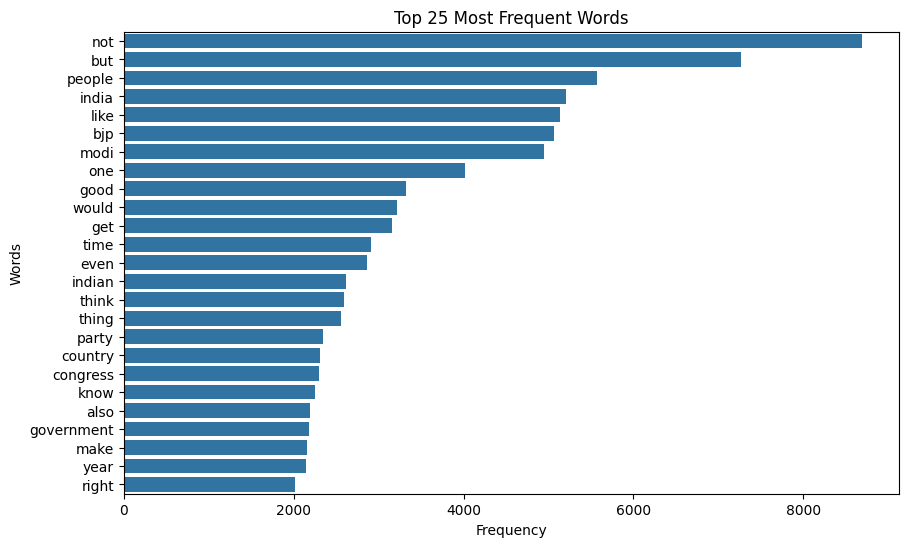

In [182]:
def plot_top_n_words(data, n = 20):
    """Plot the top N most frequent words in the dataset."""
    
    # Flatten all words in the content column.
    words = ' '.join(data['clean_comment']).split()

    # Get the top N most common words.
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting.
    words, counts = zip(*most_common_words)

    # Plot the top N words.
    plt.figure(figsize = (10, 6))
    sns.barplot(x = list(counts), y = list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(data, n = 25)